# csvファイルを読み込む

In [7]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

df = [0] * 4
files = ["log_2023_05_31_10_17_54.csv", "log_2023_05_31_10_35_15.csv", "log_2023_05_31_10_40_42.csv", "log_2023_05_31_10_47_16.csv", ]

for i in range(4):
    df[i] = pd.read_csv(files[i], 
    names = ["n","y","x0","x1","x2","x3","ymax","x0max","x1max","x2max","x3max"],
    encoding="SHIFT-JIS")


# ループ数とBPM値のグラフを描写

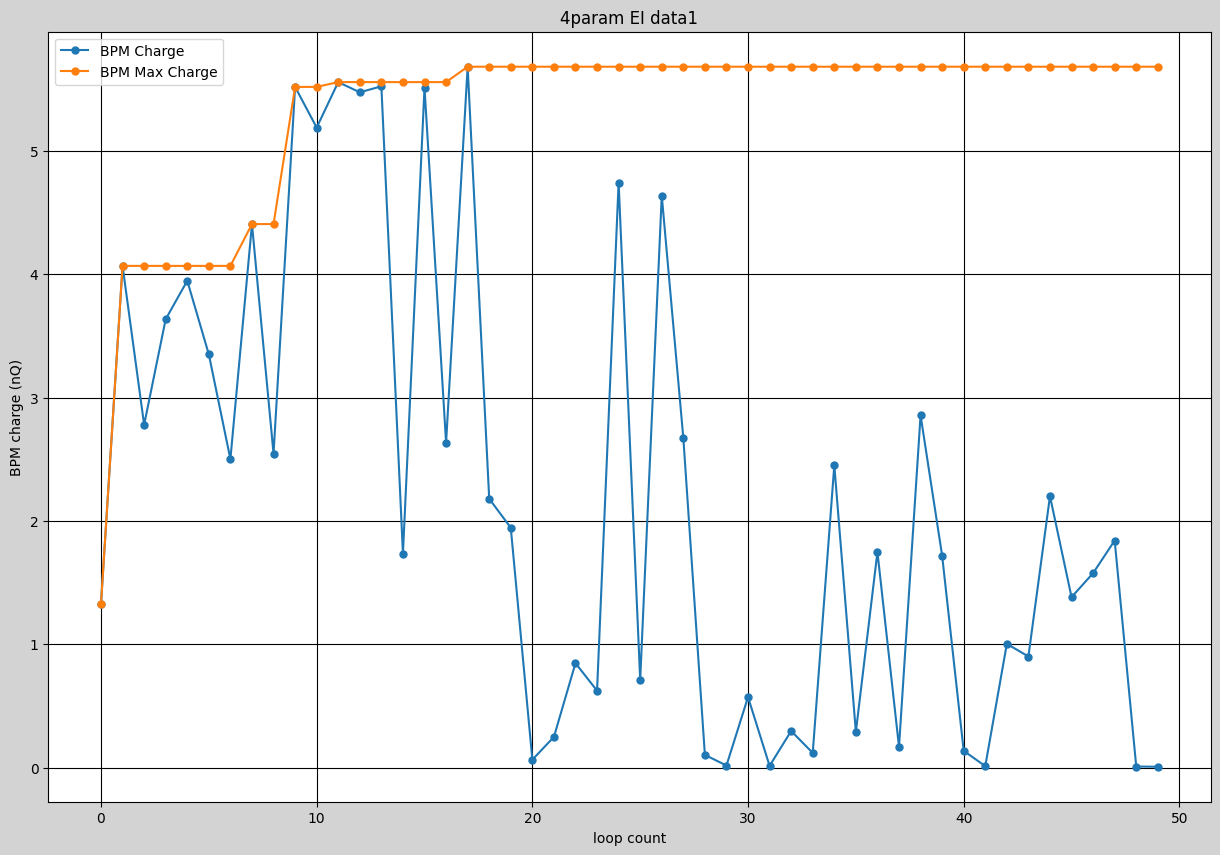

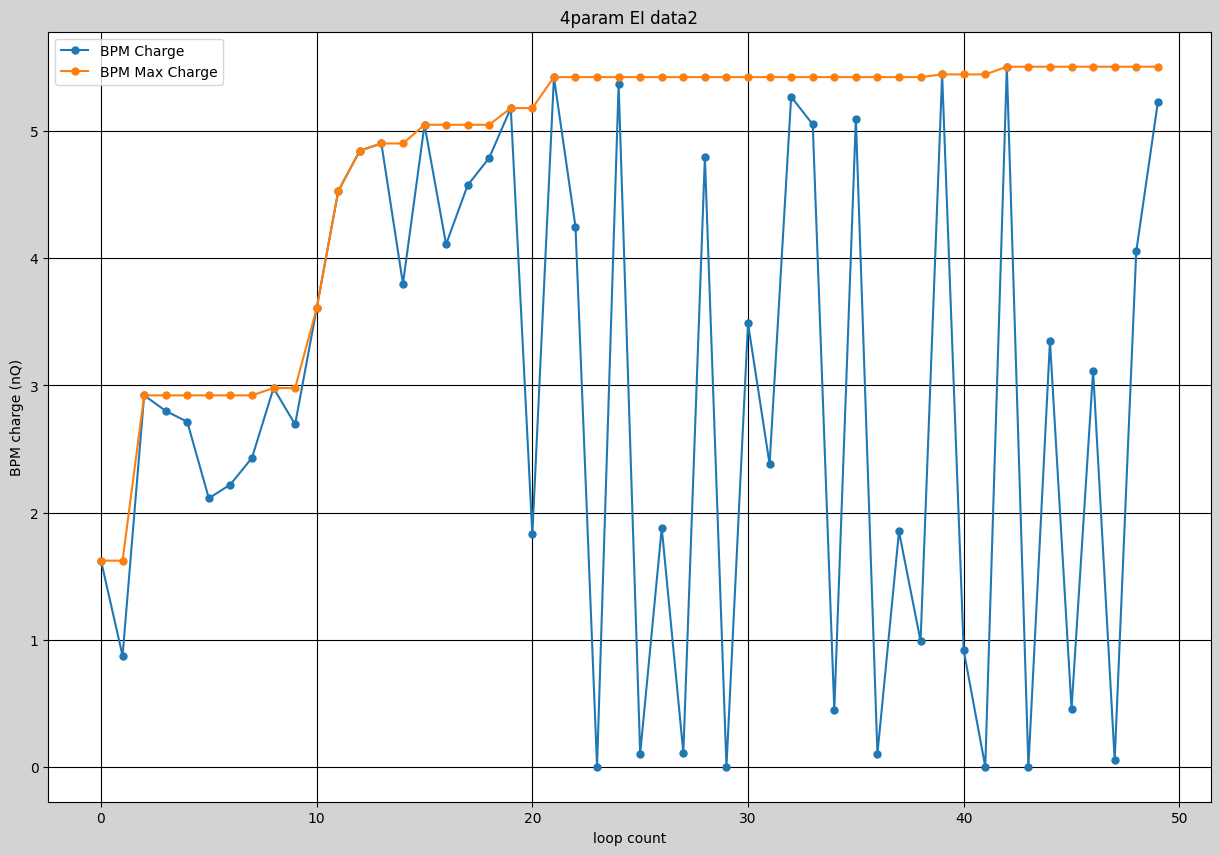

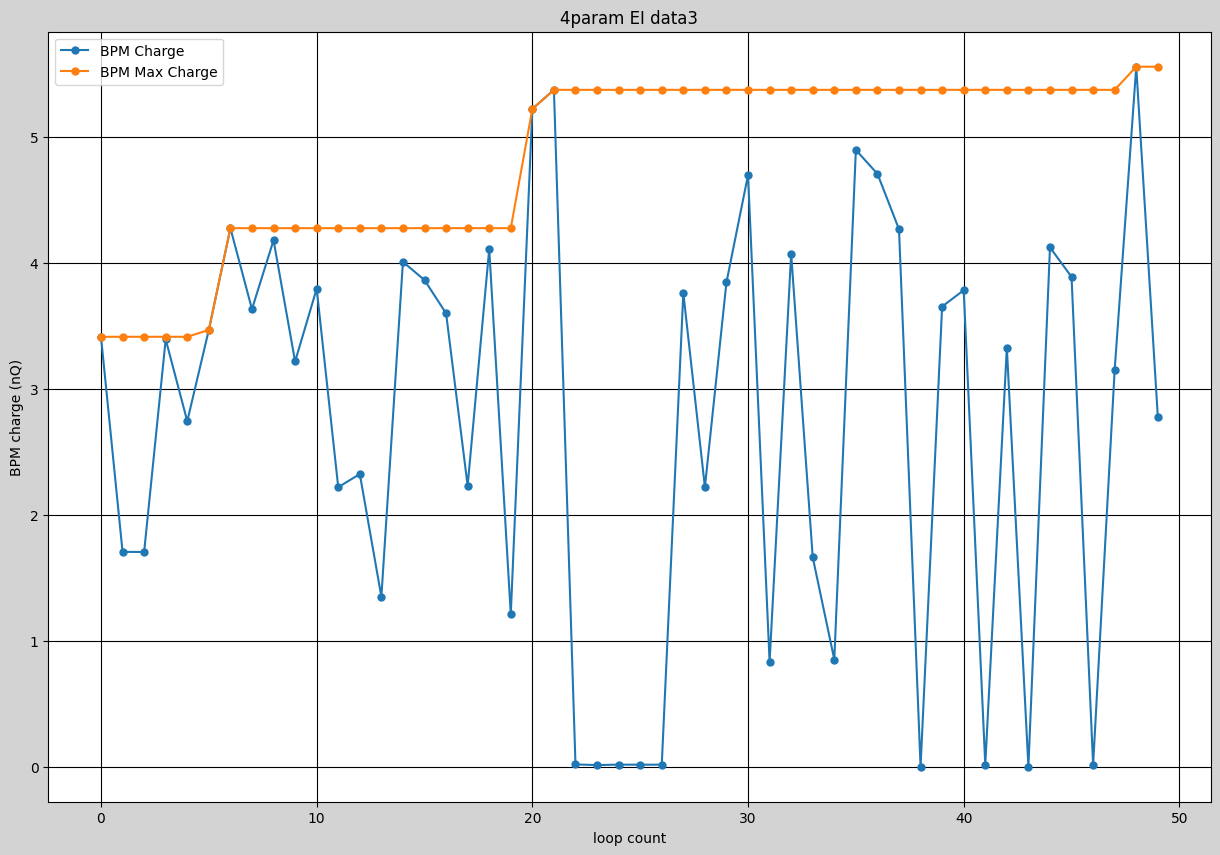

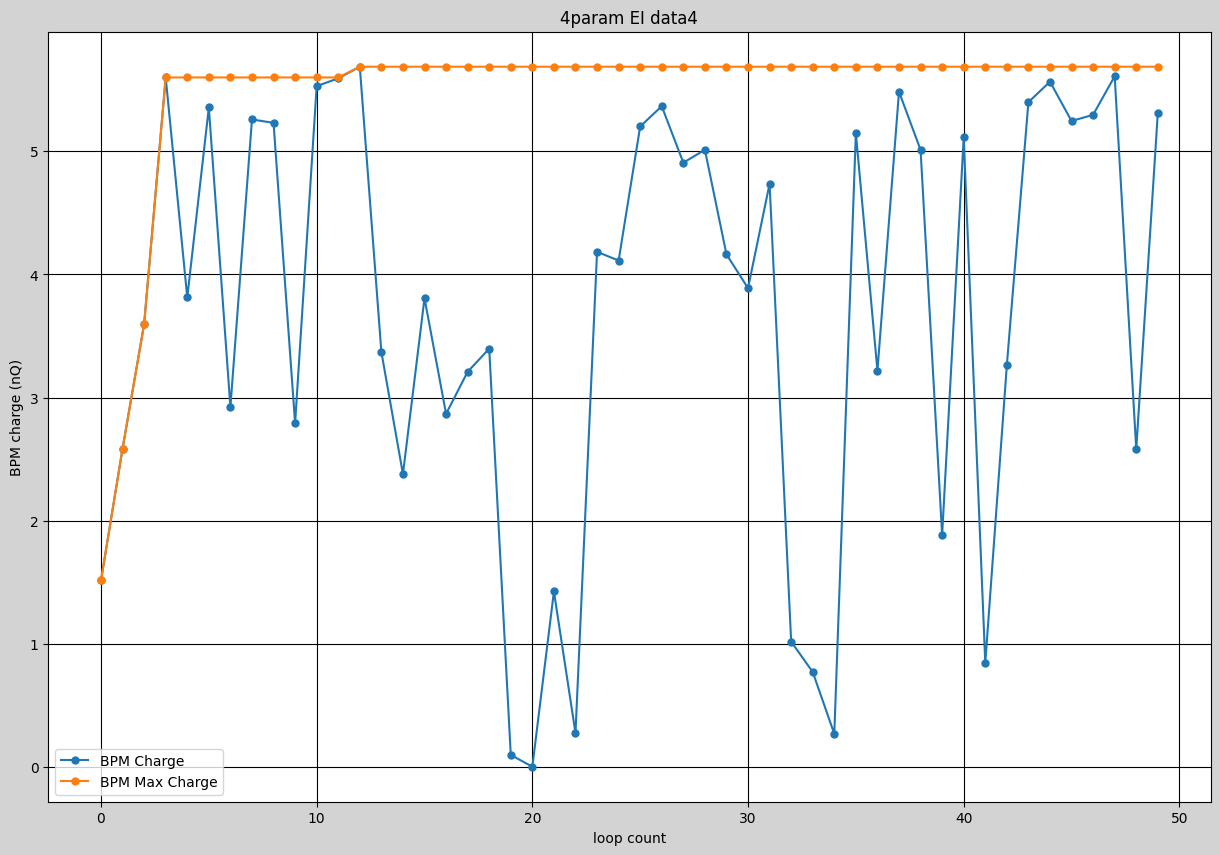

In [8]:
import matplotlib.pyplot as plt

for i in range (4):

    figi,axi = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

    plt.plot(df[i]["n"],df[i]["y"], marker = "." , markersize = 10,label = "BPM Charge")
    plt.plot(df[i]["n"],df[i]["ymax"], marker = "." , markersize = 10 , label = "BPM Max Charge")

    axi.grid(which = "major" , color = "black" , linestyle = "-")
    axi.set_xlabel("loop count")
    axi.set_ylabel("BPM charge (nQ)")
    axi.legend()
    axi.set_title('4param EI data' + str(i+1))


# 各最大値を比較

Text(0.5, 1.0, '4param EI All data')

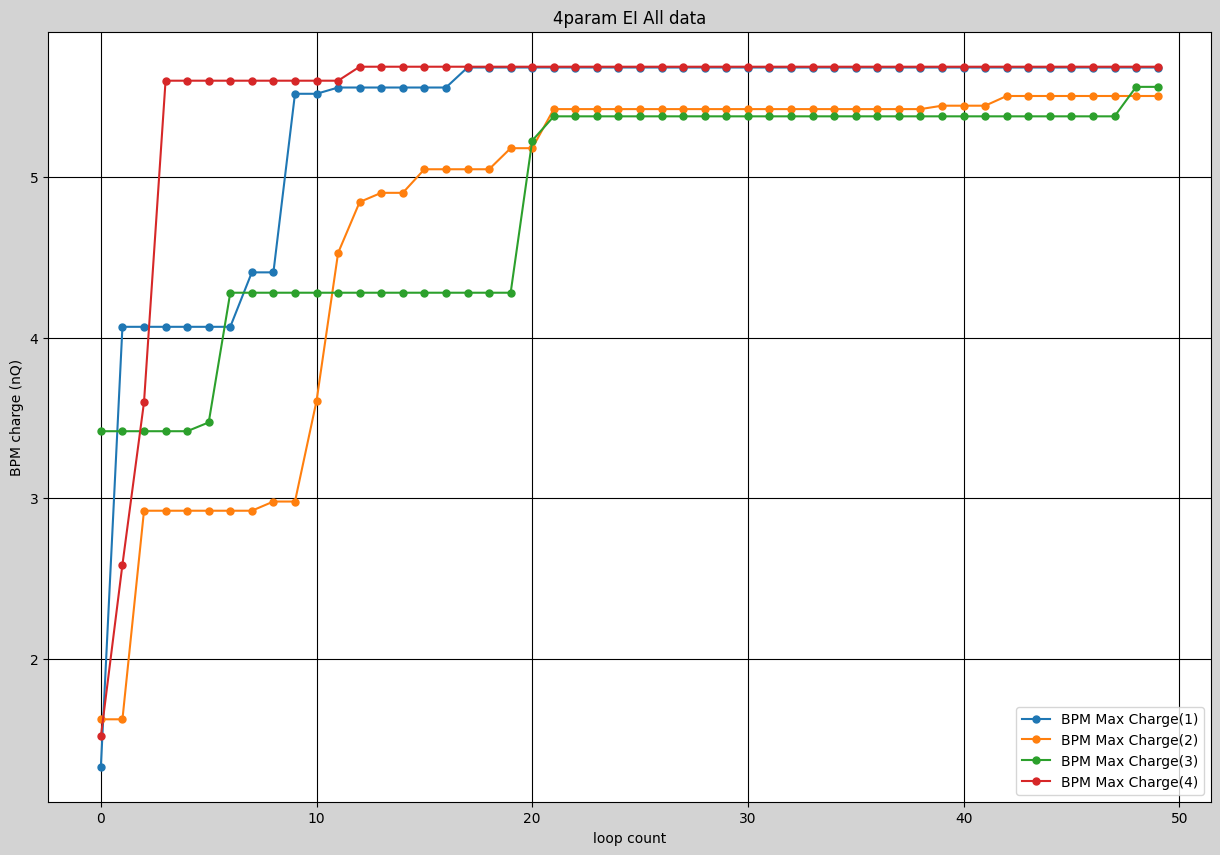

In [9]:
fig_sum,ax_sum = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

for i in range (4):

    plt.plot(df[i]["n"],df[i]["ymax"], marker = "." , markersize = 10 , label = "BPM Max Charge(" + str(i+1) + ")")
    
ax_sum.grid(which = "major" , color = "black" , linestyle = "-")
ax_sum.set_xlabel("loop count")
ax_sum.set_ylabel("BPM charge (nQ)")
ax_sum.legend()
ax_sum.set_title('4param EI All data')

# 平均を描写

Text(0.5, 1.0, '4param EI Mean data')

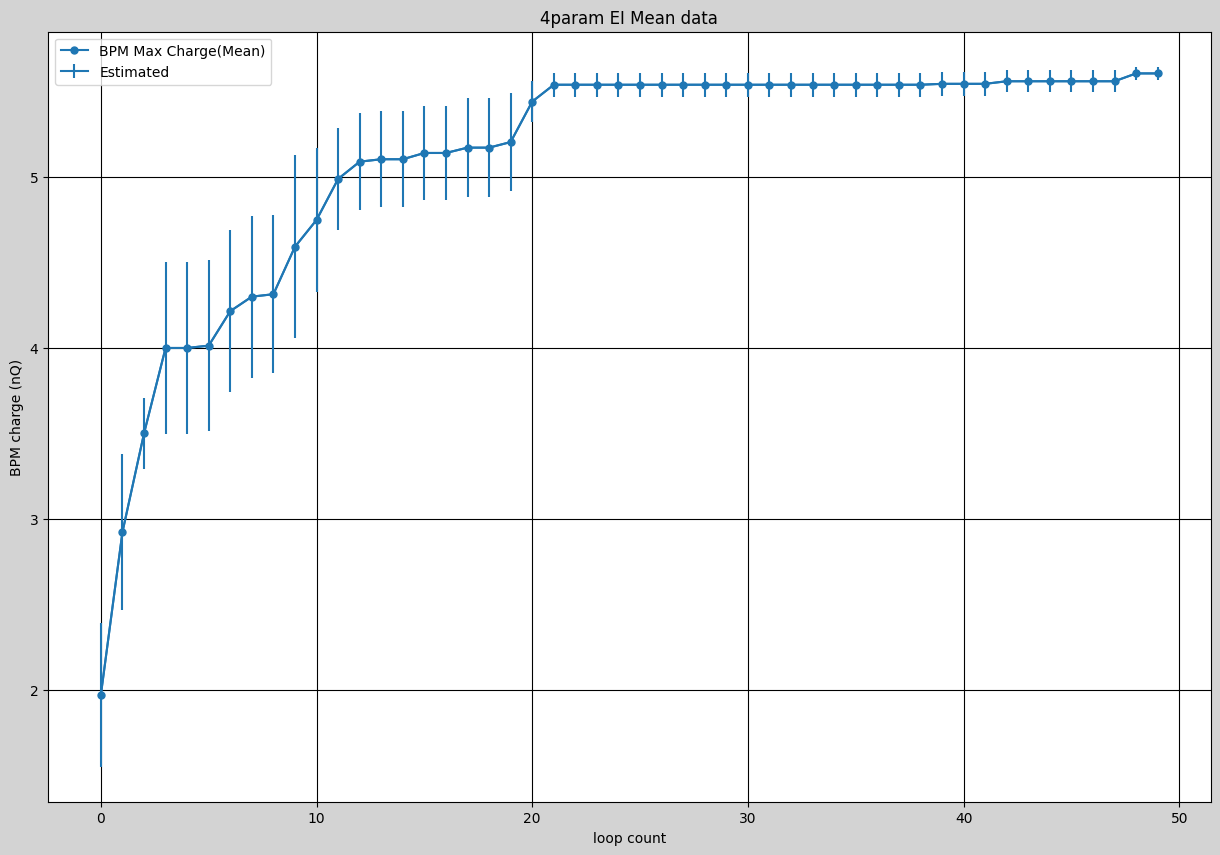

In [10]:
fig_ave,ax_ave = plt.subplots(1,1,figsize=[15,10],facecolor = 'lightgray')

sum = 0
sum_minus_mean = 0

for j in range (4):

    sum = sum + df[j]["ymax"]

mean = sum/(j+1)

for i in range (4):
    
    sum_minus_mean = sum_minus_mean + (df[i]["ymax"] - mean)**2

error = ((sum_minus_mean)**(0.5))/(i+1)

plt.plot(df[0]["n"],mean, marker = "." , markersize = 10 , label = "BPM Max Charge(Mean)")
plt.errorbar(df[0]["n"],mean, yerr=error, label='Estimated', color='C0')

ax_ave.grid(which = "major" , color = "black" , linestyle = "-")
ax_ave.set_xlabel("loop count")
ax_ave.set_ylabel("BPM charge (nQ)")
ax_ave.legend()
ax_ave.set_title('4param EI Mean data')



In [11]:
import pandas as pd
import csv

# CSVファイルからデータを読み込む
data = pd.read_csv('log_2023_05_31_10_17_54.csv')

# データの最初の数行を表示して確認
print(data.head())

import numpy as np 
import sys

import fanova

from collections import OrderedDict

import ConfigSpace
from ConfigSpace.hyperparameters import UniformFloatHyperparameter

import os
path = os.path.dirname(os.path.realpath(__file__))

my_dict = OrderedDict()
# 特徴量とターゲット変数を分ける
X = df('x0', 'x1' , 'x2' , 'x3')  # ターゲット列の名前を指定
Y = data['y']

# Fanovaオブジェクトを作成
f= fANOVA(X, Y)

# Importanceを計算
importance = f.compute_feature_importance()

# Importanceを表示
print(importance)

   0  1.328680157661438  -3.427037319155856  -0.2331789350030019  \
0  1           4.066966           -3.286636             0.557750   
1  2           2.779375           -2.973784             1.009941   
2  3           3.635028           -3.782837             0.725837   
3  4           3.946714           -2.843949             0.054743   
4  5           3.349813           -3.609377            -0.157596   

   -0.24364344395698576       3.0  1.328680157661438.1  -3.427037319155856.1  \
0             -1.828289  1.329291             4.066966             -3.286636   
1             -2.745240  1.757986             4.066966             -3.286636   
2             -1.702882  0.662839             4.066966             -3.286636   
3             -1.897944  0.841707             4.066966             -3.286636   
4             -2.016688  1.332941             4.066966             -3.286636   

   -0.2331789350030019.1  -0.24364344395698576.1     3.0.1  
0                0.55775               -1.828289 

NameError: name '__file__' is not defined

In [34]:
from fanova import fANOVA
import pandas as pd
import csv

df = [0] * 4
files = ["log_2023_05_31_10_17_54.csv", "log_2023_05_31_10_35_15.csv", "log_2023_05_31_10_40_42.csv", "log_2023_05_31_10_47_16.csv", ]

for i in range(4):
    df[i] = pd.read_csv(files[i], 
    names = ["n","y","x0","x1","x2","x3","ymax","x0max","x1max","x2max","x3max"],
    encoding="SHIFT-JIS")


X0 = df[0][["x0","x1","x2","x3"]]
Y0 = df[0]["y"]
f0 = fANOVA(X0,Y0)

X1 = df[1][["x0","x1","x2","x3"]]
Y1 = df[1]["y"]
f1 = fANOVA(X1,Y1)

X2 = df[2][["x0","x1","x2","x3"]]
Y2 = df[2]["y"]
f2 = fANOVA(X2,Y2)

X3 = df[3][["x0","x1","x2","x3"]]
Y3 = df[3]["y"]
f3 = fANOVA(X3,Y3)

#f0.quantify_importance((0,1,2,3,))
#f1.quantify_importance((0,1,2,3))
#f2.quantify_importance((0,1,2,3))
#f3.quantify_importance((0,1,2,3))


I0 = (0.14047564396019732 + 0.31774768905052575 + 0.10671424847916502 + 0.1124858400868435)/4

I1 = (0.10903915797135666 + 0.09638279493461485 + 0.12093880735210172 + 0.042471942683162886)/4

I2 = (0.14702317519665728 + 0.12761021148251672 + 0.19424824610061525 + 0.42031646674928513)/4

I3 = (0.21219144883007685 + 0.11773163374544288 + 0.21912541021385895 + 0.12432666240681889)/4



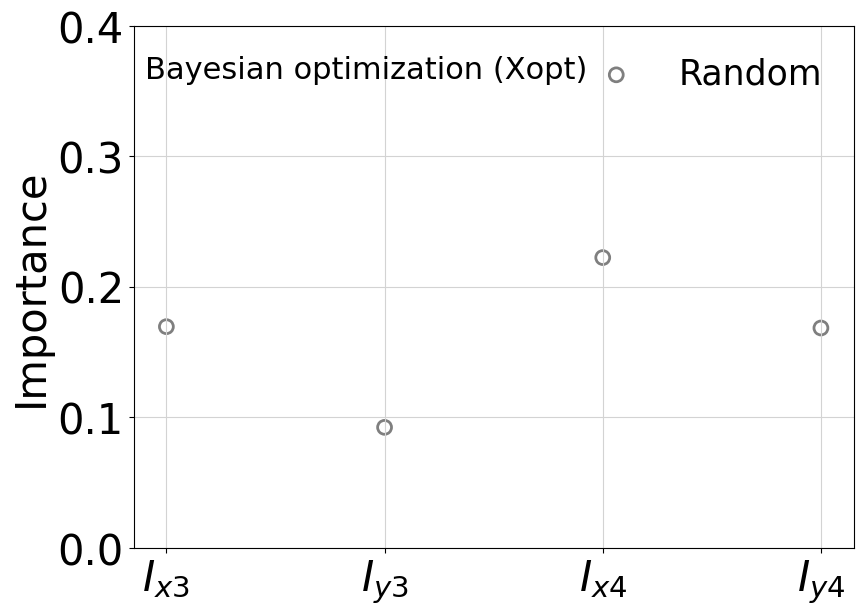

In [47]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=[9,6])
ax = fig.add_subplot(1, 1, 1)
x = ['$I_{x3}$', '$I_{y3}$' , '$I_{x4}$' , '$I_{y4}$']

y0 = [I0 , I1 , I2 , I3]

ax.scatter(x, y0, s=100, alpha=0.5, marker='o', linewidths=2,
           facecolor='None', edgecolors='black', label='Random')



ax.set_ylabel('Importance', fontsize=30)
ax.legend(loc='upper right', frameon=False, fancybox=False, fontsize=25)
ax.text(-0.1, 0.36, "Bayesian optimization", fontsize=22)
# ax.text(-0.1, 1, "(b) TPE", fontsize=20)
# ax.text(-0.1, 1, "(b) CMA-ES", fontsize=25)
plt.ylim([0, 0.4])
plt.grid(which = "major" , color = "lightgray" , linestyle = "-")
#plt.xticks(rotation=70)
plt.tick_params(labelsize=30)
plt.subplots_adjust(left=0.18, right=0.98, bottom=0.10, top=0.97)
plt.show()
